<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision with TensorFlow


Now we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> 🔑 **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)

## Get the data

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. 

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [1]:
import tensorflow as tf

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-27 16:07:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  91.3MB/s    in 1.1s    

2021-11-27 16:07:20 (91.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(filenames)} images in '{dirpath}'")

There are 1 images in 'pizza_steak'
There are 1 images in 'pizza_steak/train'
There are 750 images in 'pizza_steak/train/pizza'
There are 750 images in 'pizza_steak/train/steak'
There are 1 images in 'pizza_steak/test'
There are 250 images in 'pizza_steak/test/pizza'
There are 250 images in 'pizza_steak/test/steak'


In [7]:
# The extra file in pur pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Nov 27 16:07 .
drwxr-xr-x 1 root root 4096 Nov 27 16:07 ..
-rw-r--r-- 1 root root 6148 Nov 27 16:07 .DS_Store
drwxr-xr-x 4 root root 4096 Nov 27 16:07 test
drwxr-xr-x 4 root root 4096 Nov 27 16:07 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)


['.DS_Store' 'pizza' 'steak']


In [10]:
class_names = class_names[1:] # Remove DS_Store
print(class_names)

['pizza' 'steak']


In [11]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


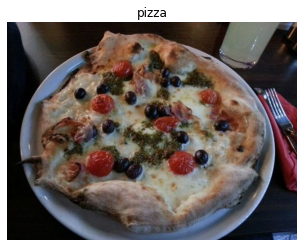

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 13,  12,  26],
        [ 11,  13,  26],
        [ 14,  16,  29],
        ...,
        [122,  94,  80],
        [145, 112,  93],
        [153, 116,  97]],

       [[ 12,  11,  25],
        [ 11,  13,  26],
        [ 13,  15,  28],
        ...,
        [128, 100,  86],
        [145, 110,  91],
        [150, 113,  94]],

       [[ 10,  12,  25],
        [ 11,  13,  26],
        [ 13,  15,  28],
        ...,
        [134, 105,  89],
        [144, 109,  89],
        [151, 113,  92]],

       ...,

       [[  5,   5,   3],
        [  4,   4,   2],
        [  3,   3,   1],
        ...,
        [ 81, 111, 181],
        [ 82, 112, 184],
        [ 74, 104, 176]],

       [[  3,   3,   1],
        [  4,   4,   2],
        [  4,   4,   2],
        ...,
        [ 96, 126, 196],
        [106, 136, 206],
        [ 97, 127, 197]],

       [[  2,   2,   0],
        [  4,   4,   2],
        [  5,   5,   3],
        ...,
        [ 81, 111, 18

In [14]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [17]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.05098039, 0.04705882, 0.10196078],
        [0.04313725, 0.05098039, 0.10196078],
        [0.05490196, 0.0627451 , 0.11372549],
        ...,
        [0.47843137, 0.36862745, 0.31372549],
        [0.56862745, 0.43921569, 0.36470588],
        [0.6       , 0.45490196, 0.38039216]],

       [[0.04705882, 0.04313725, 0.09803922],
        [0.04313725, 0.05098039, 0.10196078],
        [0.05098039, 0.05882353, 0.10980392],
        ...,
        [0.50196078, 0.39215686, 0.3372549 ],
        [0.56862745, 0.43137255, 0.35686275],
        [0.58823529, 0.44313725, 0.36862745]],

       [[0.03921569, 0.04705882, 0.09803922],
        [0.04313725, 0.05098039, 0.10196078],
        [0.05098039, 0.05882353, 0.10980392],
        ...,
        [0.5254902 , 0.41176471, 0.34901961],
        [0.56470588, 0.42745098, 0.34901961],
        [0.59215686, 0.44313725, 0.36078431]],

       ...,

       [[0.01960784, 0.01960784, 0.01176471],
        [0.01568627, 0.01568627, 0.00784314],
        [0.01176471, 0

In [ ]:
te